# Notebook for Kohn Anomaly Figure

This is the notebook that I used to create the Kohn anomaly figure. I've added some notes/annotations that include how this figure was created. All results are reproducible.

### Notebook Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import scipy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
# from tqdm import tqdm
import pandas

import sys
sys.path.append("./modules")
from modules.Plot import setup_rc_params
setup_rc_params()

from modules import Potential, FOM, ROM
from modules.ROM import apply_range_factor

In [3]:
np.random.seed(12345)

In [4]:
n = 1000
r = np.linspace(0, 12, n)

l = ll = j = 0  # use S-wave (chosen arbitrarily)
S = 0


param_pts = 900  # number of points used in the figure

ignore_error_bounds = False  # set to True when testing (to speed up tests by ignoring SVDs)
# param_pts = 35  # number of points used when testing if anomalies are present

### Plot Details

In [5]:
def make_ticks_nice(ax, tick_size=24, flip_label=False):
    ax.tick_params(which='minor', length=2)
    ax.tick_params(bottom=True, labelbottom=True,
                   top=True, labeltop=False,
                   right=True, labelright=flip_label,
                   left=True, labelleft=(not flip_label))
    ax.xaxis.set_tick_params(labelsize=tick_size)
    ax.xaxis.set_minor_locator(AutoMinorLocator())  # get minor ticks on x-axis
    ax.xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
    ax.yaxis.set_tick_params(labelsize=tick_size)
    ax.yaxis.set_minor_locator(AutoMinorLocator())  # get minor ticks on y-axis
    ax.yaxis.set_ticks_position('both')  # get log-ticks on left and right sides
#

dpi = 600

GROM_color = "cornflowerblue"
LSPGROM_color = "orange"

# error_band_alpha = 0.1
# snapshot_alpha = 0.4
# exact_error_alpha = 0.7
# estimated_error_alpha = 0.7
# scaled_estimated_error_alpha = 0.85

error_band_alpha = 0.3
snapshot_alpha = 0.6
exact_error_alpha = 0.8
estimated_error_alpha = 0.8
scaled_estimated_error_alpha = 0.9

linewidth = 3

exact_linestyle = "-"
estimated_linestyle = ":"
scaled_linestyle = "--"

axes_label_size = 26
# legend_label_size = 26
legend_label_size = 20
tick_size = 26
text_size = 26

### Define the Potential and the Parameter Bounds

In [6]:
chiral_potential = Potential.Potential("chiral", r,
                                       l=l, ll=ll, j=j, S=S)
print(chiral_potential.default_theta["CS"])

# here, an energy of 100 MeV is used. (`use_ab=False` so the solver described in the paper (and not the appendix) is used.)
chiral_solver_100 = FOM.MatrixNumerovSolver(chiral_potential, energy=100., use_ab=False)

# the value of 1.5 (or 150%) was found as I (J. M. M.) was searching for anomalies
chiral_what_to_vary = apply_range_factor({"CS": chiral_potential.default_theta["CS"]}, 1.5)

# put snapshots on the boundaries of the space (this way we're always interpolating)
snapshot_parameters = [{"CS": chiral_what_to_vary["CS"][0]}, {"CS": chiral_what_to_vary["CS"][1]}]

parameter = list(chiral_what_to_vary.keys())[0]
chiral_what_to_vary

5.4385


/Users/joshuamaldonado/Documents/GitHub/greedy-emulators/modules/SpecialFunctions.py:56: RuntimeWarning: invalid value encountered in multiply
  riccati_bessel_G = -rho * spherical_yn(l, rho)
/Users/joshuamaldonado/Documents/GitHub/greedy-emulators/modules/FOM.py:97: RuntimeWarning: invalid value encountered in divide
  self.l_prestore_over_rsq = self.l * (self.l + 1) / (self.r ** 2)


{'CS': [-2.7192499999999997, 13.596250000000001]}

### Train the emulators

Using an energy of 100 MeV (as per the solver's `energy=100.` argument.)

In [7]:
# define the emulator for the G-ROM
chiral_emulator_100_GROM = ROM.Emulator(chiral_what_to_vary, 
                                        chiral_solver_100,
                                        snapshot_parameters=snapshot_parameters,
                                        sampling_method="linear",
                                        snapshot_max=len(snapshot_parameters) + 1, 
                                        use_practically=False,
                                        greedy=True,
                                        emulation_method="G-ROM", 
                                        error_estimation_method="G-ROM",
                                        ignore_error_bounds=ignore_error_bounds,
                                        param_pts=param_pts,
                                        verbose=False)
chiral_emulator_100_GROM.train()
print("GROM at 100 MeV trained")

print("")

# define the emulator for the LSPG-ROM
chiral_emulator_100_LSPGROM = ROM.Emulator(chiral_what_to_vary, 
                                           chiral_solver_100,
                                           snapshot_parameters=snapshot_parameters,
                                           sampling_method="linear",
                                           snapshot_max=len(snapshot_parameters) + 1, 
                                           use_practically=False,
                                           greedy=True,
                                           emulation_method="LSPG-ROM", 
                                           error_estimation_method="LSPG-ROM",
                                           ignore_error_bounds=ignore_error_bounds,
                                           param_pts=param_pts,
                                           verbose=False)
chiral_emulator_100_LSPGROM.train()
print("LSPG-ROM at 100 MeV trained")

/Users/joshuamaldonado/Documents/GitHub/greedy-emulators/modules/GramSchmidt.py:80: NumbaPerformanceWarning: np.vdot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  orthogonal_matrix[:, k] -= np.vdot(orthonormal_matrix[:, j],


GROM at 100 MeV trained

LSPG-ROM at 100 MeV trained


1
2


/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_43910/1997306344.py:137: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_43910/1997306344.py:137: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_43910/1997306344.py:137: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_43910/1997306344.py:140: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig(f"./chiral_kohn_anomaly.pdf", dpi=dpi)


figure saved


/Users/joshuamaldonado/Documents/GitHub/greedy-emulators/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoMinorLocator does not work on logarithmic scales
  fig.canvas.print_figure(bytes_io, **kw)


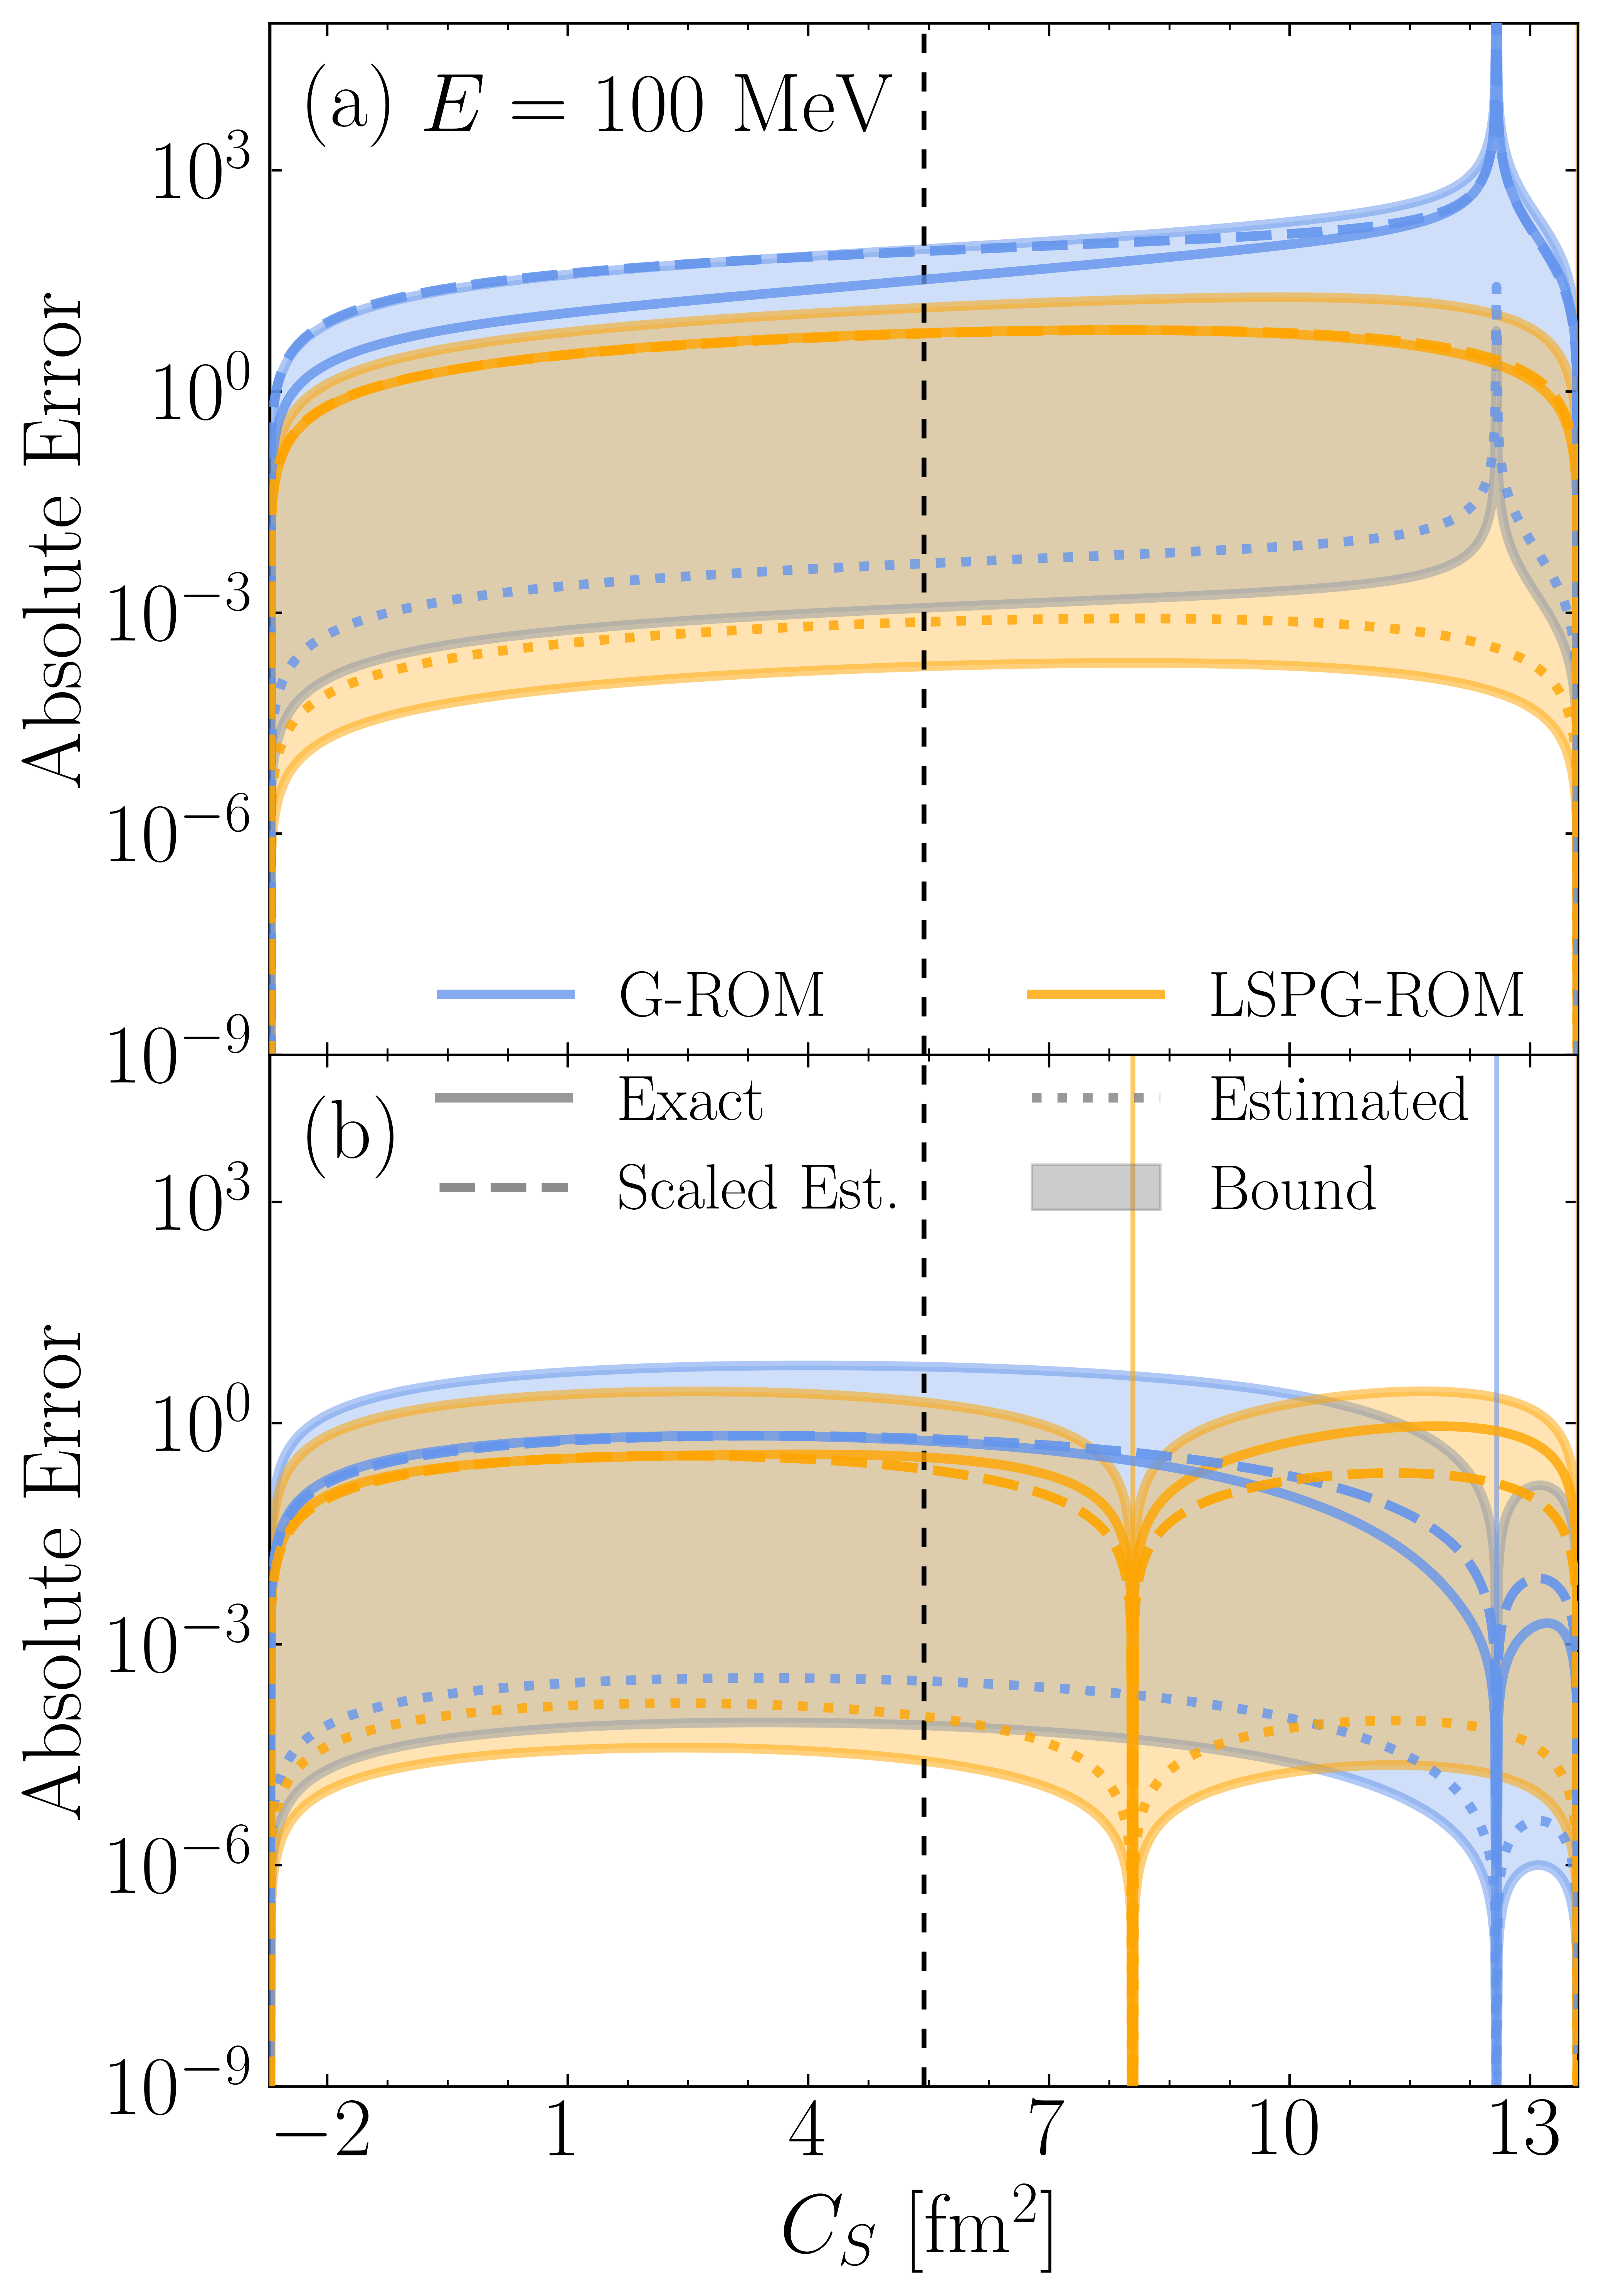

In [8]:
energy = 100  # here the energy is defined as an int (for readability in the figure)

# define what parameter we're plotting
plot_parameter = list(chiral_what_to_vary.keys())[0]
plot_label = plot_parameter[0] + "_" + plot_parameter[1]
plot_label
space = chiral_emulator_100_GROM.parameter_space[parameter]


# make the figure --
fig, ax = plt.subplots(2, 1, dpi=dpi, figsize=(7, 10))

# line(s) for the best-fit parameter value
ax[0].axvline(chiral_potential.default_theta["CS"], color="black", linestyle=(0, (4, 4)))
ax[1].axvline(chiral_potential.default_theta["CS"], color="black", linestyle=(0, (4, 4)))

# loop over snapshots (this is a bit overkill since it's only two snapshots)
for q, i in enumerate(np.arange(len(snapshot_parameters) - 1, chiral_emulator_100_GROM.snapshots.shape[1])):
    print(i)
    # these made more sense as eval statements when there were multiple energies
    exact_error_GROM = eval(f"chiral_emulator_{energy}_GROM.exact_errors[i, :]")
    estimated_error_GROM = eval(f"chiral_emulator_{energy}_GROM.estimated_errors[i, :]")
    scaled_estimated_error_GROM = eval(f"chiral_emulator_{energy}_GROM.scaled_estimated_errors[i, :]")
    try:
        lower_bound_GROM = eval(f"chiral_emulator_{energy}_GROM.lower_error_bounds[i, :]")
        upper_bound_GROM = eval(f"chiral_emulator_{energy}_GROM.upper_error_bounds[i, :]")
    except:
        None
    exact_error_LSPGROM = eval(f"chiral_emulator_{energy}_LSPGROM.exact_errors[i, :]")
    estimated_error_LSPGROM = eval(f"chiral_emulator_{energy}_LSPGROM.estimated_errors[i, :]")
    scaled_estimated_error_LSPGROM = eval(f"chiral_emulator_{energy}_LSPGROM.scaled_estimated_errors[i, :]")
    try:
        lower_bound_LSPGROM = eval(f"chiral_emulator_{energy}_LSPGROM.lower_error_bounds[i, :]")
        upper_bound_LSPGROM = eval(f"chiral_emulator_{energy}_LSPGROM.upper_error_bounds[i, :]")
    except:
        None

    # snapshots
    for snapshot_parameter in eval(f"chiral_emulator_{energy}_GROM.snapshot_parameters[:i + 1]"):
        ax[q].axvline(snapshot_parameter[parameter], 
                      alpha=snapshot_alpha, color=GROM_color, linewidth=linewidth / 2)
    for snapshot_parameter in eval(f"chiral_emulator_{energy}_LSPGROM.snapshot_parameters[:i + 1]"):
        ax[q].axvline(snapshot_parameter[parameter], 
                      alpha=snapshot_alpha, color=LSPGROM_color, linewidth=linewidth / 2)
    # G-ROM lines
    try:
        ax[q].plot(space, lower_bound_GROM, 
                linewidth=linewidth, alpha=error_band_alpha, color=GROM_color, zorder=1)
        ax[q].plot(space, upper_bound_GROM, 
                linewidth=linewidth, alpha=error_band_alpha, color=GROM_color, zorder=1)
        ax[q].fill_between(space, lower_bound_GROM, upper_bound_GROM, 
                        linewidth=linewidth, alpha=error_band_alpha, color=GROM_color, zorder=1)
    except:
        None
    ax[q].plot(space, exact_error_GROM,
            linewidth=linewidth, alpha=exact_error_alpha, color=GROM_color, linestyle=exact_linestyle, zorder=3)
    ax[q].plot(space, estimated_error_GROM,
            linewidth=linewidth, alpha=exact_error_alpha, color=GROM_color, linestyle=estimated_linestyle, zorder=2)
    ax[q].plot(space, scaled_estimated_error_GROM,
            linewidth=linewidth, alpha=scaled_estimated_error_alpha, color=GROM_color, linestyle=scaled_linestyle, zorder=3)
    
    # LSPG-ROM lines
    try:
        ax[q].plot(space, lower_bound_LSPGROM, 
                linewidth=linewidth, alpha=error_band_alpha, color=LSPGROM_color, zorder=1)
        ax[q].plot(space, upper_bound_LSPGROM, 
                linewidth=linewidth, alpha=error_band_alpha, color=LSPGROM_color, zorder=1)
        ax[q].fill_between(space, lower_bound_LSPGROM, upper_bound_LSPGROM, 
                        linewidth=linewidth, alpha=error_band_alpha, color=LSPGROM_color, zorder=1)
    except:
        None
    ax[q].plot(space, exact_error_LSPGROM,
            linewidth=linewidth, alpha=exact_error_alpha, color=LSPGROM_color, linestyle=exact_linestyle)
    ax[q].plot(space, estimated_error_LSPGROM,
            linewidth=linewidth, alpha=exact_error_alpha, color=LSPGROM_color, linestyle=estimated_linestyle, zorder=2)
    ax[q].plot(space, scaled_estimated_error_LSPGROM,
            linewidth=linewidth, alpha=scaled_estimated_error_alpha, color=LSPGROM_color, linestyle=scaled_linestyle, zorder=3)
    ax[q].set_xlim(space[0], space[-1])

    ax[q].set_ylabel("Absolute Error", fontsize=axes_label_size)
    ax[q].set_ylim(1e-9, 1e5)
    ax[q].set_yscale("log")
    make_ticks_nice(ax[q], tick_size=tick_size, flip_label=0)
#

# legend lines
ax[0].plot(space, exact_error_GROM + 1e20,
           linewidth=linewidth, alpha=exact_error_alpha, 
           color=GROM_color, linestyle=exact_linestyle, label="G-ROM")
ax[0].plot(space, exact_error_LSPGROM + 1e20,
           linewidth=linewidth, alpha=exact_error_alpha, 
           color=LSPGROM_color, linestyle=exact_linestyle, label="LSPG-ROM")

ax[1].plot(space, exact_error_LSPGROM + 1e20,
           linewidth=linewidth, alpha=exact_error_alpha, 
           color="grey", linestyle=exact_linestyle, label="Exact")
ax[1].plot(space, scaled_estimated_error_LSPGROM + 1e20,
           linewidth=linewidth, alpha=scaled_estimated_error_alpha, 
           color="grey", linestyle=scaled_linestyle, label="Scaled Est.")
ax[1].plot(space, estimated_error_LSPGROM + 1e20,
           linewidth=linewidth, alpha=exact_error_alpha, 
           color="grey", linestyle=estimated_linestyle, label="Estimated")
try:
    ax[1].fill_between(space, lower_bound_LSPGROM + 1e20, upper_bound_LSPGROM + 1e20, 
                       alpha=error_band_alpha + 0.1, 
                       color="grey", label="Bound")
except:
    None


# energy labels
ax[0].text(-0.8, 4e3 - 7e2, r"$E = 100$ MeV", fontsize=text_size)

# subplot labels
x = -2.25  # 9.0
y = 4e3  # 4e3
ax[0].text(x, y, r"(a)", fontsize=text_size)
ax[1].text(x, y, r"(b)", fontsize=text_size)

# final touches on the figure
xticks = np.arange(-2, 13 + 0.01, 3, dtype=float)
# xticks = np.arange(0, 10 + 0.01, 2, dtype=float)
ax[0].set_xticks(xticks, [""]*len(xticks))
ax[1].set_xticks(xticks)
ax[1].set_xlabel(rf"${plot_label}$ [fm$^2$]", fontsize=axes_label_size)

ax[0].legend(fontsize=legend_label_size, 
             ncol=2, framealpha=0, loc="lower center", 
             bbox_to_anchor=(0.547, -0.05),
             columnspacing=3.15)
legend = ax[1].legend(fontsize=legend_label_size, ncol=2, framealpha=0.0, loc="upper center", 
                      bbox_to_anchor=(0.525, 1.035), 
                      borderpad=0.08)
legend.get_frame().set_linewidth(0)


plt.tight_layout()
plt.subplots_adjust(hspace=0.0)

plt.savefig(f"./chiral_kohn_anomaly.pdf", dpi=dpi)
print("figure saved")
plt.show()


# don't forget to save the data for this plot
labels = [100]  # energy
emulators = ["G-ROM", "LSPG-ROM"]
for i, label_emulator in enumerate(zip(labels, emulators)):
    energy, emulator = label_emulator
    
    error_data = dict()
    error_data["emulator"] = emulator
    error_data["C_S (fm^2)"] = space
    error_data["energy"] = energy
    
    error_data["exact errors with two snapshots"] = eval(f"chiral_emulator_{energy}_GROM.exact_errors[1, :]")
    error_data["estimated errors with two snapshots"] = eval(f"chiral_emulator_{energy}_GROM.estimated_errors[1, :]")
    error_data["scaled estimated errors with two snapshots"] = eval(f"chiral_emulator_{energy}_GROM.scaled_estimated_errors[1, :]")
    error_data["lower error bound with two snapshots"] = eval(f"chiral_emulator_{energy}_GROM.lower_error_bounds[1, :]")
    error_data["upper error bound with two snapshots"] = eval(f"chiral_emulator_{energy}_GROM.upper_error_bounds[1, :]")
    
    error_data["exact errors with three snapshots"] = eval(f"chiral_emulator_{energy}_GROM.exact_errors[2, :]")
    error_data["estimated errors with three snapshots"] = eval(f"chiral_emulator_{energy}_GROM.estimated_errors[2, :]")
    error_data["scaled estimated errors with three snapshots"] = eval(f"chiral_emulator_{energy}_GROM.scaled_estimated_errors[2, :]")
    error_data["lower error bound with three snapshots"] = eval(f"chiral_emulator_{energy}_GROM.lower_error_bounds[2, :]")
    error_data["upper error bound with three snapshots"] = eval(f"chiral_emulator_{energy}_GROM.upper_error_bounds[2, :]")
    
    pandas.DataFrame.from_dict(data=error_data, orient="columns").to_csv(f"./figure_data/chiral_{emulator}_{energy}MeV_data.csv", header=True)
#
